# Config and Import

In [100]:
# silence warnings
import warnings
warnings.filterwarnings("ignore")

# operating system
import os

# time calculation to track some processes
import time

# numeric and matrix operations
import numpy as np
import pandas as pd

# loading ploting libraries
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# python core library for machine learning and data science
import sklearn
from sklearn import set_config
set_config(transform_output = "pandas")

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import RobustScaler, MinMaxScaler
from sklearn.impute import KNNImputer, SimpleImputer
from sklearn.cluster import KMeans

# Read files

In [101]:
ruta = '../data/'

df_sales = pd.read_csv(ruta+'df_merged.csv')

In [102]:
df_sales.head()

,id,item,category,department,store,store_code,region,date,qty_sold,yearweek,sell_price
0,ACCESORIES_1_001_BOS_1,ACCESORIES_1_001,ACCESORIES,ACCESORIES_1,South_End,BOS_1,Boston,2011-01-30,0,201105,12.7414
1,ACCESORIES_1_001_BOS_1,ACCESORIES_1_001,ACCESORIES,ACCESORIES_1,South_End,BOS_1,Boston,2011-02-06,0,201106,12.7414
2,ACCESORIES_1_001_BOS_1,ACCESORIES_1_001,ACCESORIES,ACCESORIES_1,South_End,BOS_1,Boston,2011-02-13,0,201107,12.7414
3,ACCESORIES_1_001_BOS_1,ACCESORIES_1_001,ACCESORIES,ACCESORIES_1,South_End,BOS_1,Boston,2011-02-20,0,201108,12.7414
4,ACCESORIES_1_001_BOS_1,ACCESORIES_1_001,ACCESORIES,ACCESORIES_1,South_End,BOS_1,Boston,2011-02-27,0,201109,12.7414


In [103]:
df_sales['sell_price'].isnull().sum()

30490

In [104]:
df_sales[df_sales['sell_price'].isnull()]

,id,item,category,department,store,store_code,region,date,qty_sold,yearweek,sell_price
48,ACCESORIES_1_001_BOS_1,ACCESORIES_1_001,ACCESORIES,ACCESORIES_1,South_End,BOS_1,Boston,2012-01-01,0,201101,NaN
322,ACCESORIES_1_001_BOS_2,ACCESORIES_1_001,ACCESORIES,ACCESORIES_1,Roxbury,BOS_2,Boston,2012-01-01,0,201101,NaN
596,ACCESORIES_1_001_BOS_3,ACCESORIES_1_001,ACCESORIES,ACCESORIES_1,Back_Bay,BOS_3,Boston,2012-01-01,0,201101,NaN
870,ACCESORIES_1_001_NYC_1,ACCESORIES_1_001,ACCESORIES,ACCESORIES_1,Greenwich_Village,NYC_1,New York,2012-01-01,0,201101,NaN
1144,ACCESORIES_1_001_NYC_2,ACCESORIES_1_001,ACCESORIES,ACCESORIES_1,Harlem,NYC_2,New York,2012-01-01,0,201101,NaN
...,...,...,...,...,...,...,...,...,...,...,...
8352938,SUPERMARKET_3_827_NYC_3,SUPERMARKET_3_827,SUPERMARKET,SUPERMARKET_3,Tribeca,NYC_3,New York,2012-01-01,0,201101,NaN
8353212,SUPERMARKET_3_827_NYC_4,SUPERMARKET_3_827,SUPERMARKET,SUPERMARKET_3,Brooklyn,NYC_4,New York,2012-01-01,0,201101,NaN
8353486,SUPERMARKET_3_827_PHI_1,SUPERMARKET_3_827,SUPERMARKET,SUPERMARKET_3,Midtown_Village,PHI_1,Philadelphia,2012-01-01,0,201101,NaN
8353760,SUPERMARKET_3_827_PHI_2,SUPERMARKET_3_827,SUPERMARKET,SUPERMARKET_3,Yorktown,PHI_2,Philadelphia,2012-01-01,0,201101,NaN


In [105]:
df_sales[df_sales['sell_price'].isnull()]['yearweek'].value_counts()

yearweek
201101    30490
Name: count, dtype: int64

In [106]:
df_sales['revenue']=df_sales['qty_sold']*df_sales['sell_price']

# Preparar dataframe para clustering

In [107]:
df_features = df_sales.groupby('item').agg(
                        total_sales = ('qty_sold', 'sum'),
                        min_sales = ('qty_sold', 'min'),
                        mean_sales = ('qty_sold', 'mean'),
                        max_sales = ('qty_sold', 'max'),
                        min_price = ('sell_price', 'min'),
                        max_price = ('sell_price', 'max'),    
                        total_revenue = ('revenue', 'sum'),
                        mean_revenue = ('revenue', 'mean')

                    )
df_features.sample(15)

#al hacer el groupby ya tenemos el item como index

,total_sales,min_sales,mean_sales,max_sales,min_price,max_price,total_revenue,mean_revenue
item,,,,,,,,
SUPERMARKET_3_006,4880,0,1.781022,22,9.4560,9.4560,46145.2800,16.903033
HOME_&_GARDEN_1_175,13449,0,4.908394,36,3.1250,6.2250,80779.2125,29.589455
ACCESORIES_1_131,19860,0,7.248175,129,0.6650,1.0108,17684.0258,6.477665
HOME_&_GARDEN_2_208,2637,0,0.962409,10,6.2500,16.2125,42287.8750,15.490064
SUPERMARKET_2_077,4655,0,1.698905,53,2.7240,7.7760,35217.1800,12.900066
ACCESORIES_2_019,1933,0,0.705474,14,3.9900,4.4821,8651.5968,3.169083
ACCESORIES_1_264,10677,0,3.896715,39,5.9451,5.9451,63255.8640,23.170646
ACCESORIES_1_214,1950,0,0.711679,6,9.8952,13.1404,25576.5783,9.368710
ACCESORIES_2_014,1147,0,0.418613,13,1.2901,1.2901,1479.7447,0.542031


# Clustering

In [108]:
pipe = Pipeline(steps = [
    #("Imputer", KNNImputer()), --> No tenemos nulos
    #("CustomTransformer", ClientIdFeatureGenerator), # Aqui añadimos el Transformer que hemos generado
    ("RobustScaler", RobustScaler(quantile_range = (0, 99.0))) #es un Scaler para quitar los outliers superiores en este caso
])

In [109]:
df_scaled_transformed = pipe.fit_transform(df_features)

In [110]:
df_scaled_transformed

,total_sales,min_sales,mean_sales,max_sales,min_price,max_price,total_revenue,mean_revenue
item,,,,,,,,
ACCESORIES_1_001,-0.028417,0.0,-0.028417,-0.033986,0.246068,0.340870,0.003297,0.003297
ACCESORIES_1_002,-0.023364,0.0,-0.023364,0.005098,0.015054,0.035379,-0.030856,-0.030856
ACCESORIES_1_003,-0.042319,0.0,-0.042319,-0.028888,-0.066572,0.144288,-0.069623,-0.069623
ACCESORIES_1_004,0.155075,0.0,0.155075,0.083265,0.151352,0.071864,0.354548,0.354548
ACCESORIES_1_005,0.026649,0.0,0.026649,0.015294,-0.023449,-0.013085,0.022960,0.022960
...,...,...,...,...,...,...,...,...
SUPERMARKET_3_823,0.030660,0.0,0.030660,0.108755,-0.070173,-0.034392,0.014335,0.014335
SUPERMARKET_3_824,-0.006282,0.0,-0.006282,-0.008496,0.000000,-0.049132,-0.033284,-0.033284
SUPERMARKET_3_825,0.020921,0.0,0.020921,0.042482,-0.000695,0.034392,0.041513,0.041513


In [111]:
sse = {}

for k in range(2, 15):

    print(f"Fitting pipe with {k} clusters")

    clustering_model = KMeans(n_clusters = k)
    clustering_model.fit(df_scaled_transformed)

    sse[k] = clustering_model.inertia_ #la metrica inertia es la dispersion

Fitting pipe with 2 clusters
Fitting pipe with 3 clusters
Fitting pipe with 4 clusters
Fitting pipe with 5 clusters
Fitting pipe with 6 clusters
Fitting pipe with 7 clusters
Fitting pipe with 8 clusters
Fitting pipe with 9 clusters
Fitting pipe with 10 clusters
Fitting pipe with 11 clusters
Fitting pipe with 12 clusters
Fitting pipe with 13 clusters
Fitting pipe with 14 clusters


## Elbow curve

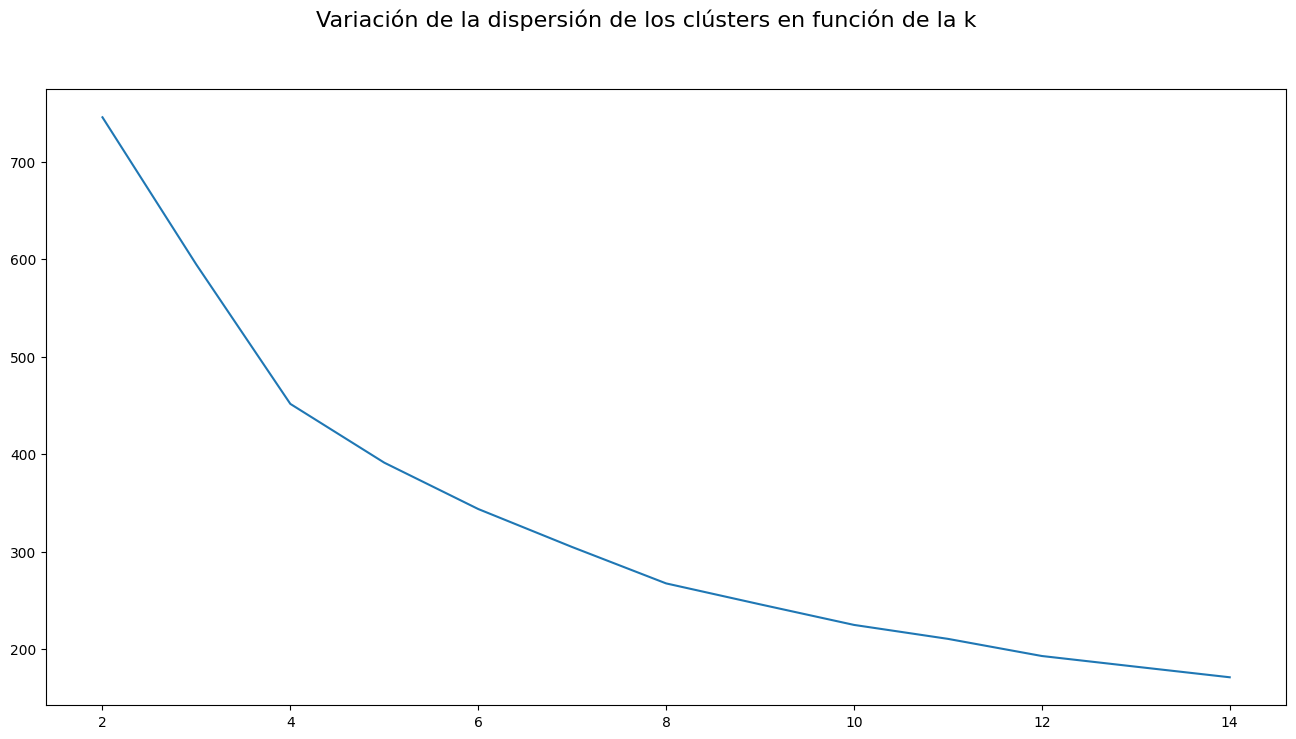

In [112]:
fig = plt.figure(figsize = (16, 8))
ax = fig.add_subplot()

x_values = list(sse.keys())
y_values = list(sse.values())

ax.plot(x_values, y_values, label = "Inertia/dispersión de los clústers")
fig.suptitle("Variación de la dispersión de los clústers en función de la k", fontsize = 16);

Vemos que hay dos puntos donde hay diferencia en la pendiente, uno con 4 clusters y otro mas pronunciado con 8. Este es el que cogemos

## Segmentación de los clientes con la "k adecuada"

In [113]:
## Añadimos el clstering a la pipeline 

pipe = Pipeline(steps = [
    
    ("RobustScaler", RobustScaler(quantile_range = (0, 99.0))),
    ("Clustering", KMeans(n_clusters = 8, random_state = 175))
])

In [114]:
#nos sirve para ver todos los pasos de la pipeline a la vez que fiteamos
pipe.fit(df_features)

Pipeline(steps=[('RobustScaler', RobustScaler(quantile_range=(0, 99.0))),
                ('Clustering', KMeans(random_state=175))])

In [115]:
#X_processed = pipe[:2].transform(df_features)
X_processed = df_features.copy() 
#para poder analizar las variables sin escalado nos saltamos los ultimos pasos y procesamos los datos iniciales justo antes del escalado

In [116]:
labels = pipe.predict(df_features)
X_processed["cluster"] = labels

In [117]:
X_processed.shape

(3049, 9)

In [118]:
X_processed.head()

,total_sales,min_sales,mean_sales,max_sales,min_price,max_price,total_revenue,mean_revenue,cluster
item,,,,,,,,,
ACCESORIES_1_001,4093,0,1.493796,13,6.6500,12.7414,45024.4900,16.492487,4
ACCESORIES_1_002,5059,0,1.846350,36,2.6600,5.2801,26584.0134,9.737734,1
ACCESORIES_1_003,1435,0,0.523723,16,1.2502,7.9401,5652.2340,2.070415,1
ACCESORIES_1_004,39175,0,14.297445,82,5.0141,6.1712,234678.0345,85.962650,7
ACCESORIES_1_005,14621,0,5.336131,42,1.9950,4.0964,55641.0687,20.381344,1


# Ficha de los productos

In [135]:
ficha_df = pd.DataFrame()

In [120]:
df_features.columns.to_list

<bound method IndexOpsMixin.tolist of Index(['total_sales', 'min_sales', 'mean_sales', 'max_sales', 'min_price',
       'max_price', 'total_revenue', 'mean_revenue'],
      dtype='object')>

In [122]:
resumen_data = X_processed[["cluster", 'total_sales']].groupby("cluster").describe().T[1:]
resumen_data

cluster                       0             1              2             3  \
total_sales mean  172840.681818  11271.171252   53935.708861  9.613855e+05   
            std    50110.351111   8458.912840   29681.326512  5.818570e+04   
            min    77106.000000    568.000000   13484.000000  9.202420e+05   
            25%   138591.000000   4381.000000   28625.000000  9.408138e+05   
            50%   160530.000000   8868.000000   49634.000000  9.613855e+05   
            75%   200410.250000  16432.000000   71848.000000  9.819572e+05   
            max   284333.000000  42294.000000  146719.000000  1.002529e+06   

cluster                      4              5             6              7  
total_sales mean   7066.389302  382372.333333   5909.469388   56463.686217  
            std    5655.811426   98951.677406   4550.813291   24463.687681  
            min     746.000000  260598.000000    855.000000   11616.000000  
            25%    2956.000000  295689.000000   2643.000000   37936.000000  
            50%    5294.000000  390001.000000   4283.000000   51033.000000  
            75%    9831.000000  396172.000000   8114.250000   68270.000000  
            max   32492.000000  565299.000000  19385.000000  133105.000000

In [137]:
for i, col in enumerate(['total_sales', 'min_sales', 'mean_sales', 'max_sales', 'min_price',
       'max_price', 'total_revenue', 'mean_revenue']):
    resumen_data = X_processed[["cluster", col]].groupby("cluster").describe().T[1:]
    ficha_df = pd.concat([ficha_df, resumen_data])

In [140]:
ficha_df.style.background_gradient(cmap = 'Blues', axis = 1)